<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/UCLStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-19-ac662c8d471b>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing the dataset:
uefa_competitions = pd.ExcelFile('UEFA Competitions finals.xlsx')
ucl = pd.read_excel(uefa_competitions, 'UEFA Champions League finals')

# Displaying the last 5 champions:
ucl.tail()

,Season,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won
63,2018–19,England,Liverpool,2–0,Tottenham Hotspur,England,Metropolitano Stadium,Madrid,Spain,63272,Regular time
64,2019–20,Germany,Bayern Munich,1–0,Paris Saint-Germain,France,Estádio da Luz,Lisbon,Portugal,0,Regular time
65,2020–21,England,Chelsea,1–0,Manchester City,England,Estádio do Dragão,Porto,Portugal,14110,Regular time
66,2021–22,Spain,Real Madrid,1–0,Liverpool,England,Stade de France,Saint-Denis,France,75000,Regular time
67,2022–23,England,Manchester City,1–0,Inter Milan,Italy,Atatürk Olympic Stadium,Istanbul,Turkey,71412,Regular time


In [3]:
# Displaying the number of rows and columns in the dataset:
ucl.shape

(68, 11)

In [4]:
# Displaying the datatypes presented in the columns:
ucl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Season                 68 non-null     object
 1   Winners country        68 non-null     object
 2   Winners                68 non-null     object
 3   Score                  68 non-null     object
 4   Runners-up             68 non-null     object
 5   Runners-up country     68 non-null     object
 6   Venue                  68 non-null     object
 7   Host city              68 non-null     object
 8   Host Country           68 non-null     object
 9   Attendance             68 non-null     int64 
 10  How the match was won  68 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.0+ KB


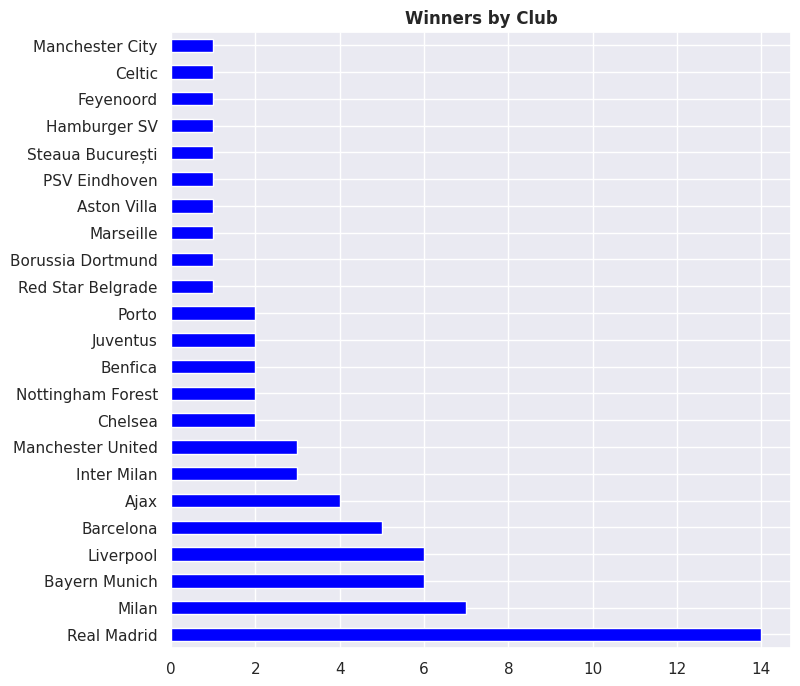

In [5]:
# Displaying the number of titles by club:
ucl['Winners'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Winners by Club', fontweight = 'bold')
plt.show()

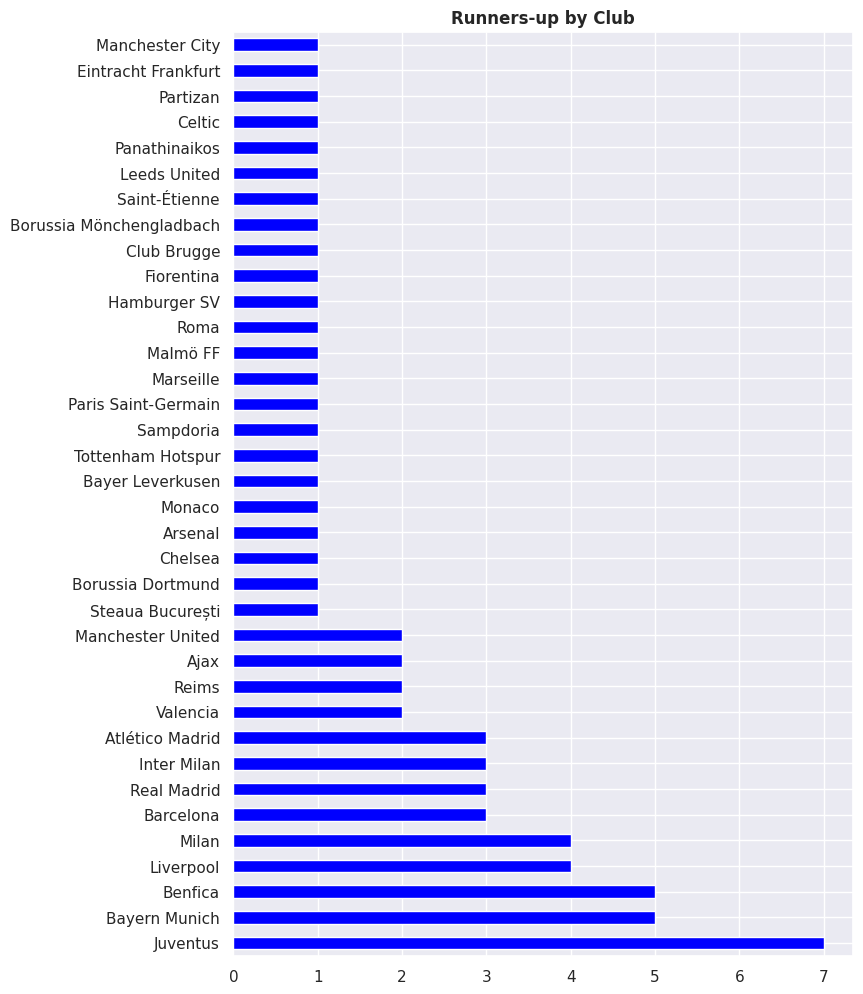

In [6]:
# Displaying the number of runners-up by club:
ucl['Runners-up'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Runners-up by Club', fontweight = 'bold')
plt.show()

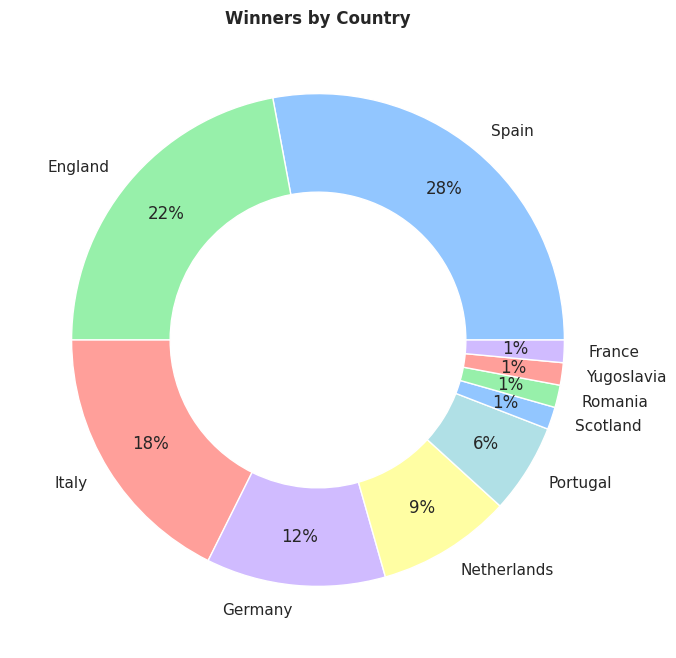

In [7]:
# Displaying the number of titles by country:
ucl['Winners country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Winners by Country', fontweight = 'bold')
plt.show()

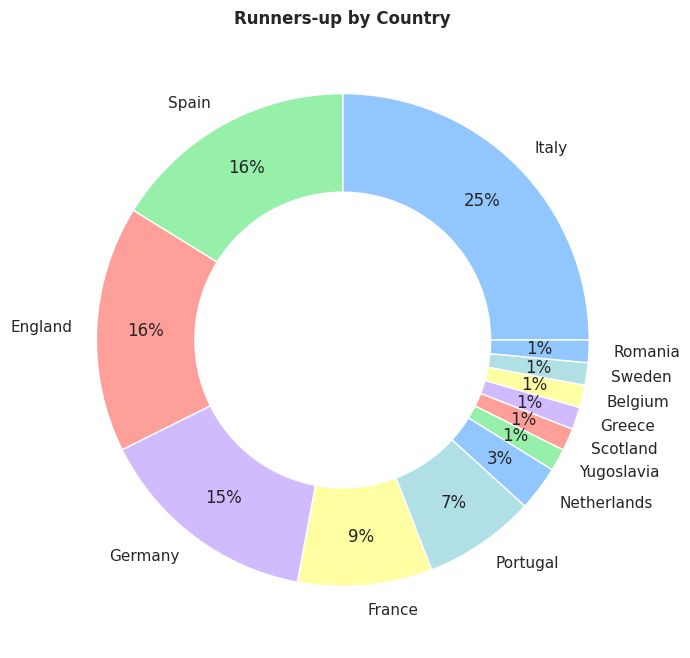

In [8]:
# Displaying the number of runners-up by country:
ucl['Runners-up country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Runners-up by Country', fontweight = 'bold')
plt.show()

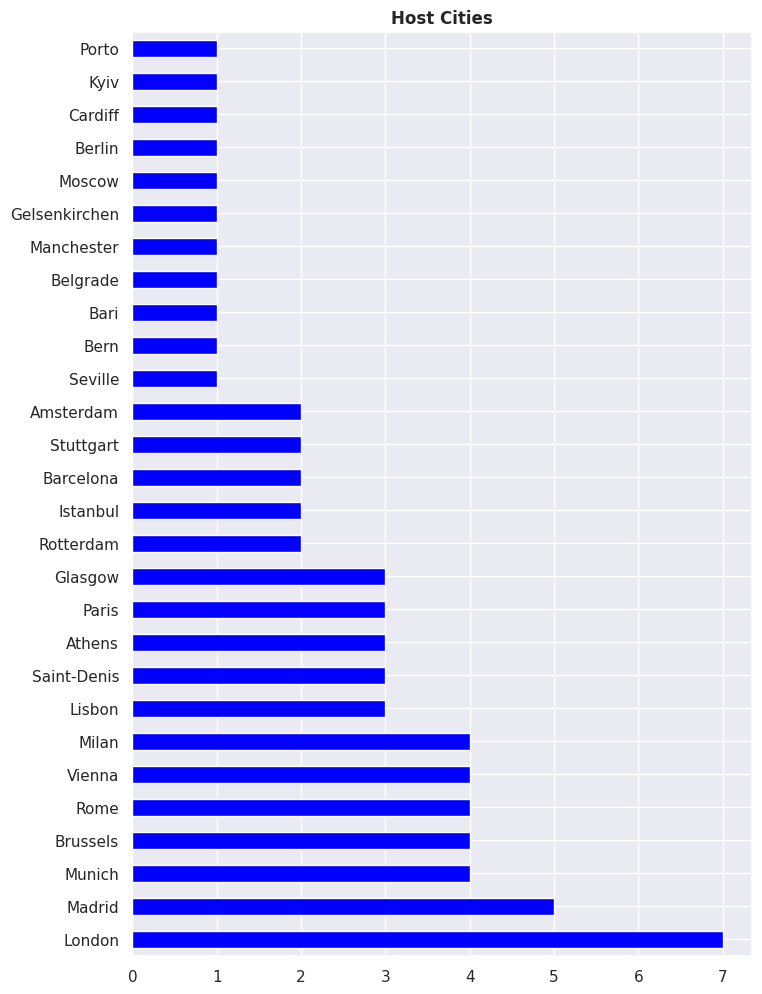

In [9]:
# Displaying the cities that hosted finals:
ucl['Host city'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Host Cities', fontweight = 'bold')
plt.show()

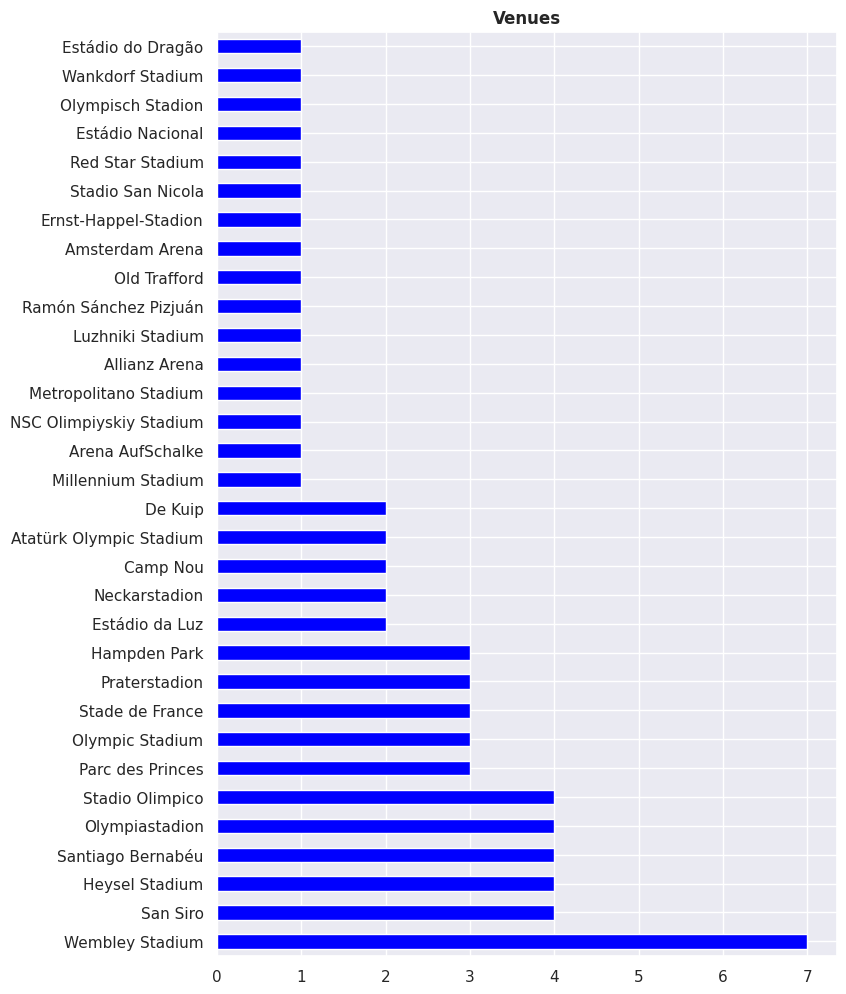

In [10]:
# Displaying the venues that hosted finals:
ucl['Venue'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Venues', fontweight = 'bold')
plt.show()

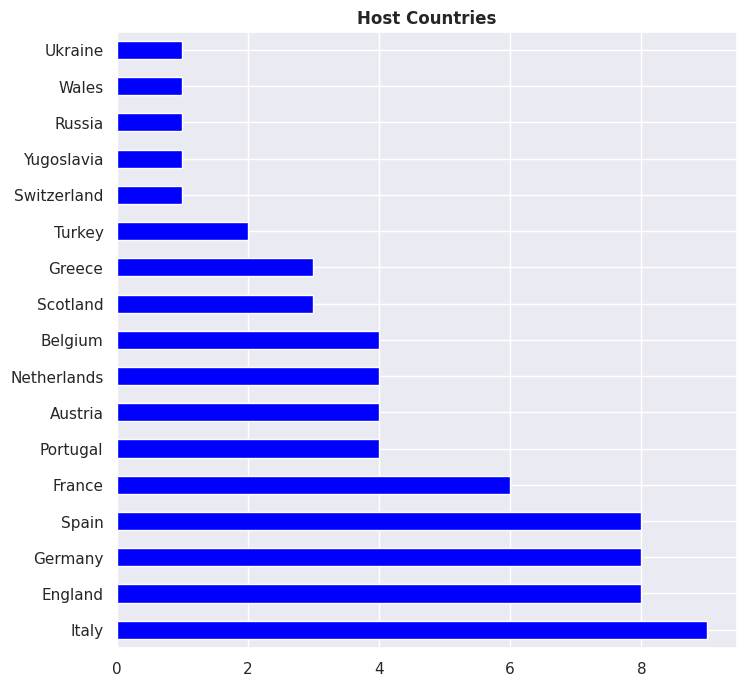

In [13]:
# Displaying the countries that hosted finals:
ucl['Host Country'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Host Countries', fontweight = 'bold')
plt.show()

In [14]:
# Checking if the club won UCL at home or away:
def champion_at_home(row):
  winners_country = row['Winners country']
  host_country = row['Host Country']
  if winners_country == host_country:
    result = 'Home'
  else:
    result = 'Away'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ucl['Home champion?'] = ucl.apply(champion_at_home, axis=1)
ucl.head()

,Season,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won,Home champion?
0,1955–56,Spain,Real Madrid,4–3,Reims,France,Parc des Princes,Paris,France,38239,Regular time,Away
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,Santiago Bernabéu,Madrid,Spain,124000,Regular time,Home
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,Heysel Stadium,Brussels,Belgium,67000,Extra time,Away
3,1958–59,Spain,Real Madrid,2–0,Reims,France,Neckarstadion,Stuttgart,Germany,72000,Regular time,Away
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,Hampden Park,Glasgow,Scotland,127621,Regular time,Away


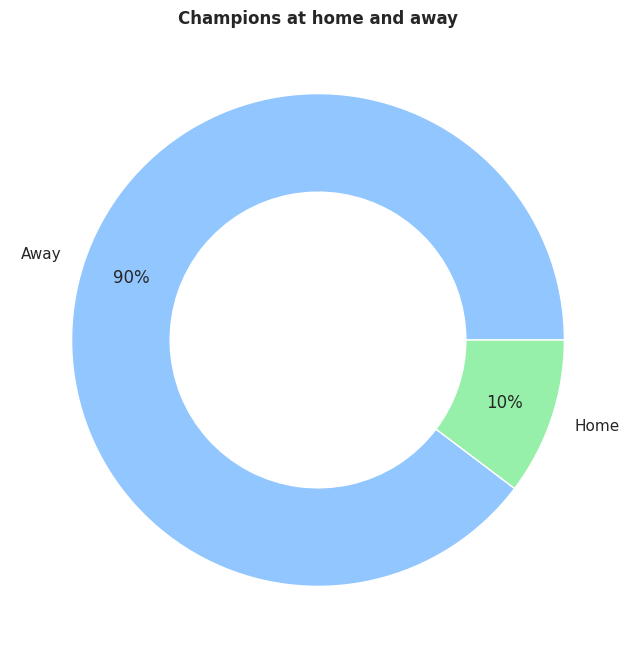

In [15]:
# Displaying the clubs who were champions at home and away:
ucl['Home champion?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Champions at home and away', fontweight = 'bold')
plt.show()

In [16]:
# Checking if the club was UCL runner-up at home or away:
def runner_up_at_home(row):
  runners_up_country = row['Runners-up country']
  host_country = row['Host Country']
  if runners_up_country == host_country:
    result = 'Home'
  else:
    result = 'Away'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ucl['Home runners-up?'] = ucl.apply(runner_up_at_home, axis=1)
ucl.head()

,Season,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won,Home champion?,Home runners-up?
0,1955–56,Spain,Real Madrid,4–3,Reims,France,Parc des Princes,Paris,France,38239,Regular time,Away,Home
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,Santiago Bernabéu,Madrid,Spain,124000,Regular time,Home,Away
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,Heysel Stadium,Brussels,Belgium,67000,Extra time,Away,Away
3,1958–59,Spain,Real Madrid,2–0,Reims,France,Neckarstadion,Stuttgart,Germany,72000,Regular time,Away,Away
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,Hampden Park,Glasgow,Scotland,127621,Regular time,Away,Away


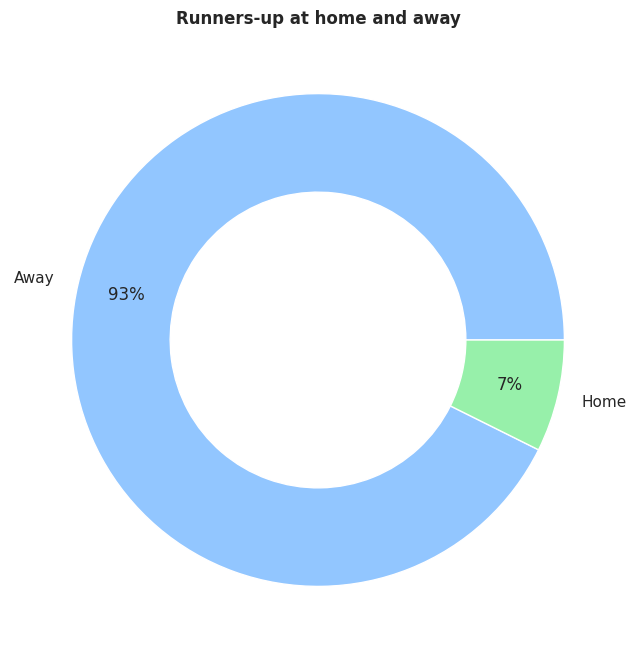

In [17]:
# Displaying the clubs who were runners-up at home and away:
ucl['Home runners-up?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Runners-up at home and away', fontweight = 'bold')
plt.show()

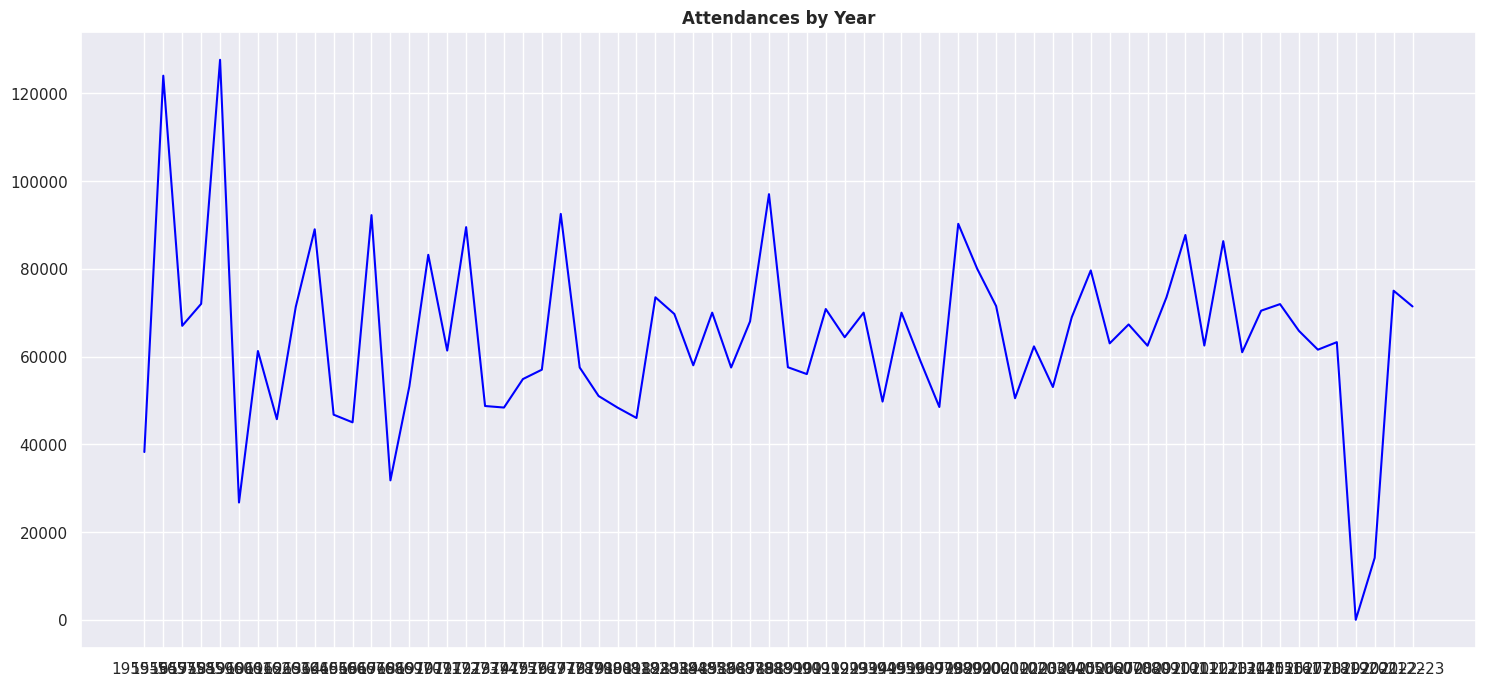

In [22]:
# Displaying the attendances by year:
plt.figure(figsize = (18, 8))
plt.title('Attendances by Year', fontweight = 'bold')
plt.plot(ucl['Season'], ucl['Attendance'], color = 'blue')
plt.show()